# LDA
LDA = Linear Discriminant Analysis, liniowa analiza dyskryminacyjna.

Stanowi algorytm klasyfikacyjny, ale w trakcie uczenia wykrywa on njbardziej charakterystyczne osie pomiędzy klasami, dzięki którym jesteśmy w stanie zdefiniować hiperpłaszczyznę rzutowania danych. Zaletą tego rozwiązania jest maksymalne możliwe rozdzielenie klas, zatem analiza LDA stanowi dobry sposób redukowania wymiarowości przed uruchomieniem innego algorytmu klasyfikującego, np. maszyny SVM.
(na podstawie: Aurelien Geron, Uczenie maszynowe z użyciem Scickit-Learn i TensorFlow)

## Kolejne elementy implementacji LDA:
* [Wprowadzenie](#LDA_INIT)
* [Przetwarzanie danych](#LDA_DATAPROCESSING)
* [Proces wizualizacji](#LDA_VISUALISATION)
* [Finalny rozklad próbek](#LDA_SUMMARY)

<a id='LDA_INIT'></a>
## Wprowadzenie
Aby przeprowadzdzić wizualizacje LDA, wykorzystliśmy zbiór 'wine'. Posiada on 178 próbek trzech klas opisanych poprzez 14 składowych. W przypadku naszej analizy zmienną objaśnianą jest rodzaj wina. Wizualizacja pierwotnego zbioru danych byłaby niemożliwa / nie dająca możliwości analizy ze względu na dużą liczbę wymiarów. Pobieranie danych i ich tabelaryczna prezentacja zostały zaimplementowane w trzech kolejnych blokach.

## Instalacja używanych pakietów

In [5]:
library(ggfortify)
library(factoextra)
library(ggplot2)
library(MASS)
library(car)

Warning message:
"package 'factoextra' was built under R version 3.6.3"Welcome! Want to learn more? See two factoextra-related books at https://goo.gl/ve3WBa
Warning message:
"package 'MASS' was built under R version 3.6.3"Loading required package: carData
Warning message:
"package 'carData' was built under R version 3.6.3"

In [6]:
  UCI <- "http://archive.ics.uci.edu/ml"
  REPOS <- "machine-learning-databases"
  wine.url <- sprintf("http://archive.ics.uci.edu/ml/machine-learning-databases/wine/wine.data")
  wine <- read.csv(wine.url, header=FALSE) 
  colnames(wine) <- c('Type', 'Alcohol', 'Malic', 'Ash', 
                      'Alcalinity', 'Magnesium', 'Phenols', 
                      'Flavanoids', 'Nonflavanoids',
                      'Proanthocyanins', 'Color', 'Hue', 
                      'Dilution', 'Proline')
  wine$Type <- as.factor(wine$Type)
#   save(wine, file="wine.Rdata", compress=TRUE)

In [7]:
wine

Type,Alcohol,Malic,Ash,Alcalinity,Magnesium,Phenols,Flavanoids,Nonflavanoids,Proanthocyanins,Color,Hue,Dilution,Proline
1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735
1,14.20,1.76,2.45,15.2,112,3.27,3.39,0.34,1.97,6.75,1.05,2.85,1450
1,14.39,1.87,2.45,14.6,96,2.50,2.52,0.30,1.98,5.25,1.02,3.58,1290
1,14.06,2.15,2.61,17.6,121,2.60,2.51,0.31,1.25,5.05,1.06,3.58,1295
1,14.83,1.64,2.17,14.0,97,2.80,2.98,0.29,1.98,5.20,1.08,2.85,1045
1,13.86,1.35,2.27,16.0,98,2.98,3.15,0.22,1.85,7.22,1.01,3.55,1045


<a id='LDA_DATAPROCESSING'></a>
## Przetwarzanie danych

Wyżej przedstawiony zbiór danych zostanie poddany procesowi liniowej analizy dyskryminacyjnej (LDA). Celem liniowej analizy dyskryminacyjnej jest odnalezienie takich kombinacji zmiennych, aby uzyskać jak najlepszą separację grup. Do tego celu wykokrzystana został funkcja `lda` z pakietu `MASS`.

In [10]:
library(MASS)
library(car)

In [115]:
lda_res <- lda(Type ~., data = wine)

Funkcja dyskryminacyjna (kombinacja liniowa cech):

-0.403 * Alcohol + 0.165 * Malic - 0.369 * Ash + 0.155 * Alcalinity - 0.002 * Magnesium + 0.618 * Phenols - 1.66 * Flavanoids - 1.496 * Nonflavanoids + 0.134 * Proanthocyanins + 0.355 * Color - 0.818 * Hue - 1.15 * Dilution - 0.003 * Proline

<a id='LDA_VISUALISATION'></a>
## Proces wizualizacji

### LDA

Aby przedstawić wyniki liniowej analizy dyskryminacyjnej na histogramach wykorzystano funkcję `ldahist`. 

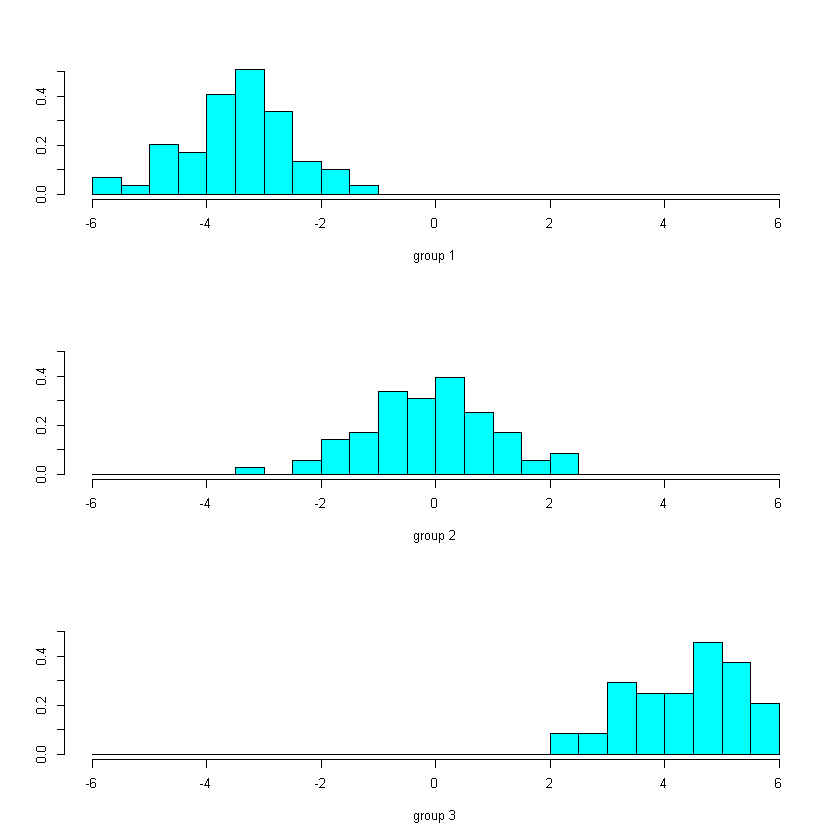

In [99]:
lda_res.values <- predict(lda_res)
ldahist(lda_res.values$x[,1], g = wine$Type)


Histogramy dla drugiej funkcji dyskryminacji.

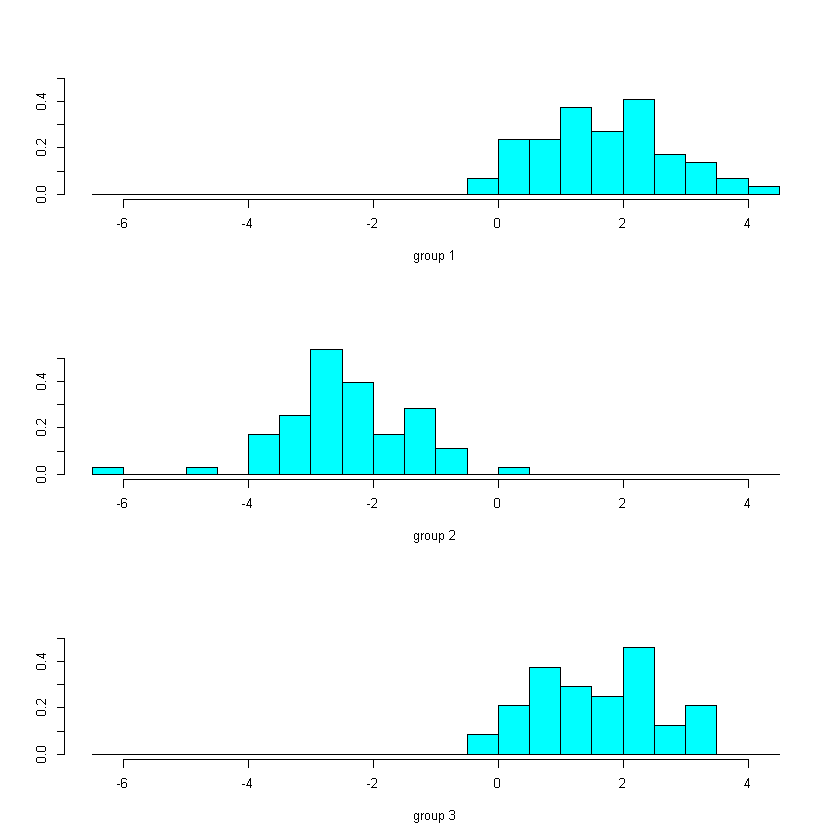

In [90]:
ldahist(lda_res.values$x[,2], g = wine$Type)

Wykres punktowy funkcji dyskryminacji.

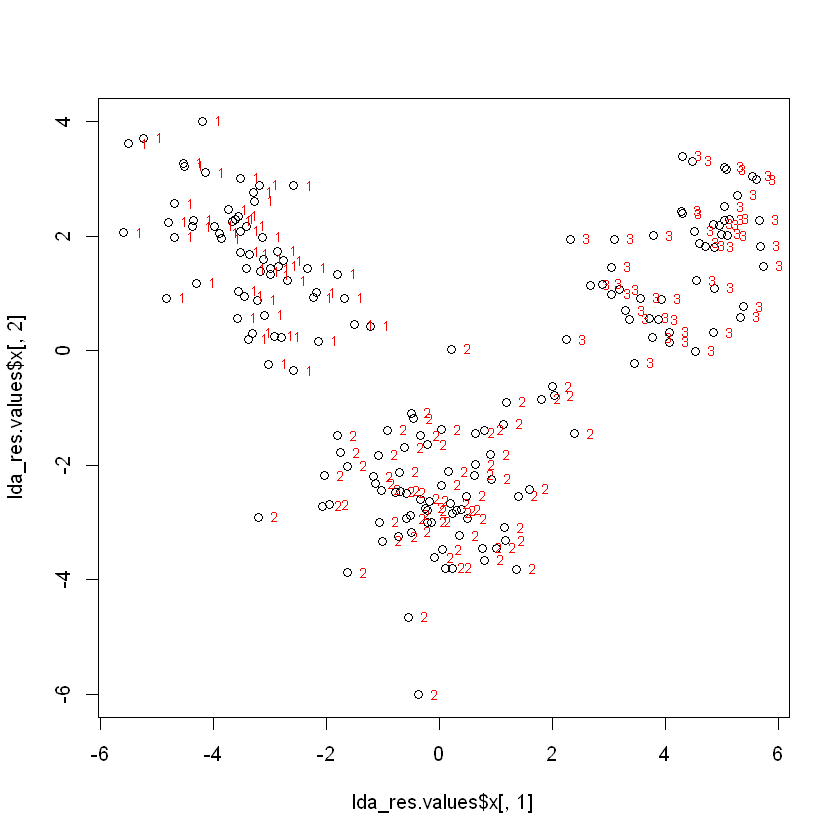

In [110]:

plot(lda_res.values$x[,1], lda_res.values$x[,2])
text(lda_res.values$x[,1], lda_res.values$x[,2], wine$Type, cex = 0.7, pos = 4, col = "red")

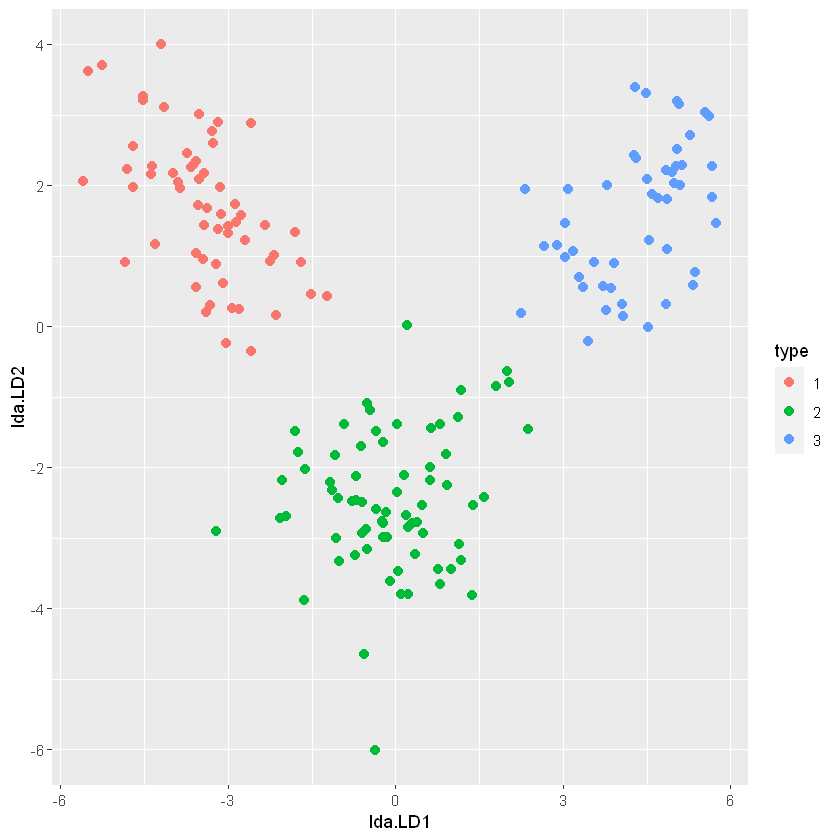

In [103]:
newdata <- data.frame(type = wine[,1], lda = lda_res.values$x)
library(ggplot2)
ggplot(newdata) + geom_point(aes(lda.LD1, lda.LD2, colour = type), size = 2.5)


# kmeans

Proces klasteryzacji danych został przeprowadzony przy pomocy algorytmu k-średnich. Wykorzystany do tego został pakiet `factoextra`. Do oceny jakości uzyskanych w procesie klasteryzacji wyników wykorzystano pakiet `clValid`.

In [82]:
library("factoextra")
library(clValid)

Jako liczbę centroidów (klastrów) przyjęto 3, gdyż tyle wynosi liczba klas w analizowanym zbiorze. Do określenia liczby klastrów można wykorzystać byłoby także metodę łokciową.

In [83]:
# Compute k-means with k = 3
set.seed(123)
wine_scale_data = scale(wine[,2:14]) 
wine_not_scale_data = wine[,2:14]
kmeans_scale <- kmeans(wine_scale_data, 3, nstart = 25)
kmeans_not_scale <- kmeans(wine_not_scale_data, 3, nstart = 25)
# K-means clusters showing the group of each individuals
kmeans_scale$cluster

[1] 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 [38] 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 3 3 1 3 3 3 3 3 3 3 3 3 3 3 2
 [75] 3 3 3 3 3 3 3 3 3 1 3 3 3 3 3 3 3 3 3 3 3 2 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3
[112] 3 3 3 3 3 3 3 1 3 3 2 3 3 3 3 3 3 3 3 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
[149] 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1

In [84]:
# dunn(clusters = res.km$cluster, Data = scale(wine[,2:14]))

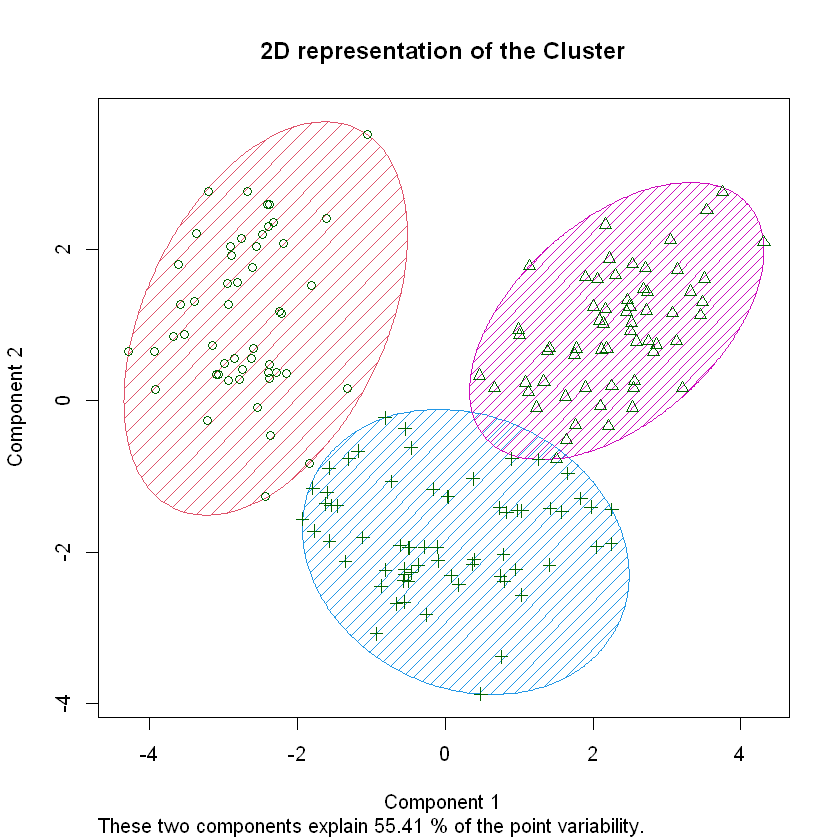

In [85]:
clusplot(wine_scale_data, kmeans_scale$cluster, main='2D representation of the Cluster',
         color=TRUE, shade=TRUE,
         lines=0)

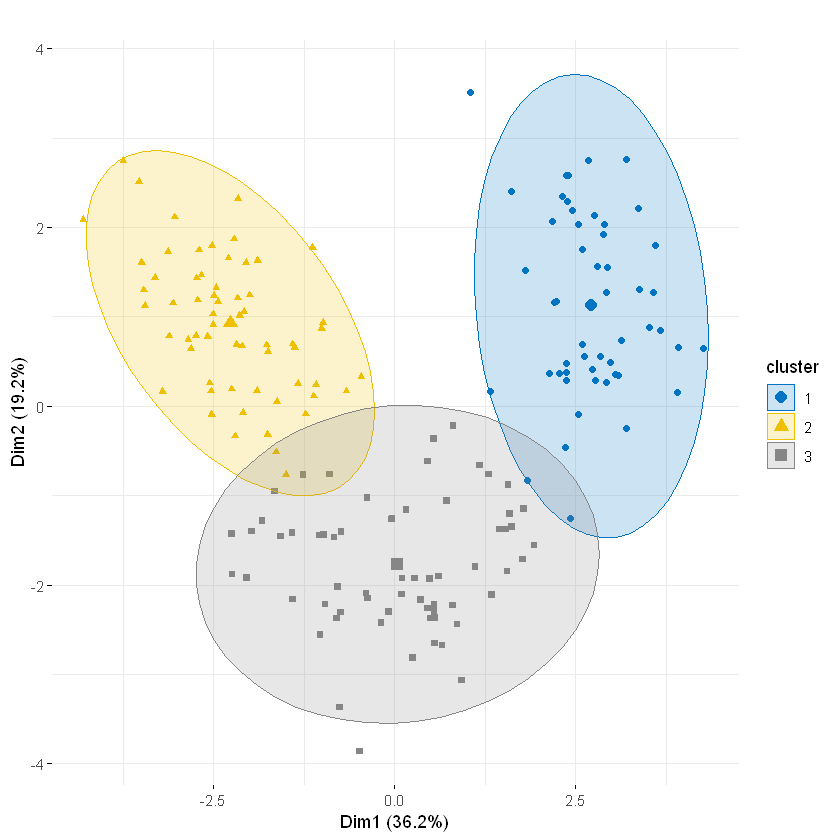

In [86]:
fviz_cluster(object = kmeans_scale, # kmeans object 
             data = wine_scale_data, # data used for clustering
             ellipse.type = "norm",
             geom = "point",
             palette = "jco",
             main = "",
             ggtheme = theme_minimal())

## Index dunna

Jako indeks wewnętrzny do oceny wyników klasteryzacji wykorzystaliśmy indeks Dunna. Jest to ocena wewnętrzna, gdyż przeprowadzona została na podstawie danych poddanych grupowaniu z użyciem funkcji oceny.

Oczekiwana jest mała odległość wewnątrz grupy (mianownik mały) i duża odległość pomiędzy grupami, stąd większe wartości są lepsze.

In [87]:
dunn(clusters = kmeans_scale$cluster, Data = wine_scale_data)

[1] 0.2322567

Uzyskana wartość indeksu byłaby wyższa, gdyby obserwacje wewnątrz klastrów były bardziej skupione. Odległości między grupami nie są duże, grupy częściowo się pokrywają, stąd stosunkowo niska wartość wskaźnika wewnętrznego.

In [88]:
wine_scale_data

Alcohol,Malic,Ash,Alcalinity,Magnesium,Phenols,Flavanoids,Nonflavanoids,Proanthocyanins,Color,Hue,Dilution,Proline
1.51434077,-0.56066822,0.23139979,-1.16630317,1.90852151,0.8067217,1.0319081,-0.65770780,1.22143845,0.251008784,0.3611585,1.84272147,1.01015939
0.24559683,-0.49800856,-0.82566722,-2.48384052,0.01809398,0.5670481,0.7315653,-0.81841060,-0.54318872,-0.292496232,0.4049085,1.11031723,0.96252635
0.19632522,0.02117152,1.10621386,-0.26798225,0.08810981,0.8067217,1.2121137,-0.49700500,2.12995937,0.268262912,0.3174085,0.78636920,1.39122370
1.68679140,-0.34583508,0.48655389,-0.80697481,0.92829983,2.4844372,1.4623994,-0.97911340,1.02925134,1.182731669,-0.4263410,1.18074072,2.32800680
0.29486844,0.22705328,1.83522559,0.45067448,1.27837900,0.8067217,0.6614853,0.22615759,0.40027531,-0.318377423,0.3611585,0.44833648,-0.03776747
1.47738706,-0.51591132,0.30430096,-1.28607930,0.85828399,1.5576991,1.3622851,-0.17559941,0.66234866,0.729810822,0.4049085,0.33565890,2.23274072
1.71142720,-0.41744613,0.30430096,-1.46574348,-0.26196936,0.3273744,0.4912911,-0.49700500,0.67982021,0.082781041,0.2736585,1.36384178,1.72465497
1.30493643,-0.16680747,0.88751034,-0.56742256,1.48842650,0.4871569,0.4812796,-0.41665360,-0.59560339,-0.003489596,0.4486584,1.36384178,1.74053265
2.25341491,-0.62332789,-0.71631546,-1.64540766,-0.19195352,0.8067217,0.9518167,-0.57735640,0.67982021,0.061213382,0.5361584,0.33565890,0.94664867
1.05857838,-0.88291793,-0.35180959,-1.04652705,-0.12193769,1.0943301,1.1220109,-1.13981619,0.45268998,0.932546820,0.2299086,1.32158768,0.94664867


In [89]:
dunn(clusters = kmeans_not_scale$cluster, Data = wine_not_scale_data)

[1] 0.01626044

# Ocena klasteryzacji - index zewnętrzny

Oceny klasteryzacji dokonano tekże przy pomocy indeksu zewnętrznego, czyli dokonano oceny na podstawie danych które nie były użyte do grupowania w postaci znanych etykiet klas reprezentującyh ground truth (zmienna objaśniana).

In [90]:
kmeans_scale$cluster

[1] 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 [38] 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 3 3 1 3 3 3 3 3 3 3 3 3 3 3 2
 [75] 3 3 3 3 3 3 3 3 3 1 3 3 3 3 3 3 3 3 3 3 3 2 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3
[112] 3 3 3 3 3 3 3 1 3 3 2 3 3 3 3 3 3 3 3 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
[149] 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1

Etykiety klastrów zostały dostosowane do etykiet ze zbioru danych `wines`.

In [91]:
# change cluster indexes order to match the indexes/types order from wines dataset
kmeans_scale$cluster <- kmeans_scale$cluster - 1
kmeans_scale$cluster[kmeans_scale$cluster == 0] <- 3
kmeans_scale$cluster

[1] 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 [38] 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 3 2 2 2 2 2 2 2 2 2 2 2 1
 [75] 2 2 2 2 2 2 2 2 2 3 2 2 2 2 2 2 2 2 2 2 2 1 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
[112] 2 2 2 2 2 2 2 3 2 2 1 2 2 2 2 2 2 2 2 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3
[149] 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3

Widzimy "na oko", że skuteczność klasteryzacji jest wysoka (wiemy, że obserwacje w zbiorze danych były posortowane po wartości zmiennej objaśnianej).

# Accuracy, Precission i Recall (confusion matrix etc)

Na podstawie : https://danushka.net/lect/dm/Clustering - strona 30

In [92]:
confusion_matrix <- matrix(0,2,2)
confusion_matrix

0,0
0,0


In [93]:
one_in_one <- length(kmeans_scale$cluster[kmeans_scale$cluster == wine$Type & kmeans_scale$cluster == 1 ])
one_in_two <- length(kmeans_scale$cluster[kmeans_scale$cluster == 2 & wine$Type == 1 ])
one_in_three <- length(kmeans_scale$cluster[kmeans_scale$cluster == 3 & wine$Type == 1 ])
two_in_one <- length(kmeans_scale$cluster[kmeans_scale$cluster == 1 & wine$Type == 2 ])
two_in_two <- length(kmeans_scale$cluster[kmeans_scale$cluster == wine$Type & kmeans_scale$cluster == 2 ])
two_in_three <- length(kmeans_scale$cluster[kmeans_scale$cluster == 3 & wine$Type == 2 ])
three_in_one <- length(kmeans_scale$cluster[kmeans_scale$cluster == 1 & wine$Type == 3 ])
three_in_two <- length(kmeans_scale$cluster[kmeans_scale$cluster == 2 & wine$Type == 3 ])
three_in_three <- length(kmeans_scale$cluster[kmeans_scale$cluster == wine$Type & kmeans_scale$cluster == 3 ])

In [94]:
cluster_one_size <- length(kmeans_scale$cluster[kmeans_scale$cluster == 1])
cluster_two_size <- length(kmeans_scale$cluster[kmeans_scale$cluster == 2])
cluster_three_size <- length(kmeans_scale$cluster[kmeans_scale$cluster == 3])

In [95]:
TPFP <- choose(cluster_one_size, 2) + 
choose(cluster_two_size, 2) + 
choose(cluster_three_size, 2)

TPFP

[1] 5246

In [96]:
TP <- choose(one_in_one, 2) + choose(one_in_two, 2) + choose(one_in_three, 2) + 
    choose(two_in_one, 2) + choose(two_in_two, 2) + choose(two_in_three, 2) + 
    choose(three_in_one, 2) + choose(three_in_two, 2) + choose(three_in_three, 2)

TP

[1] 4925

In [97]:
FP <- TPFP - TP
FP

[1] 321

In [98]:
TNFN <- cluster_one_size * cluster_two_size + cluster_one_size * cluster_three_size + cluster_two_size * cluster_three_size
TNFN

[1] 10507

In [99]:
FN <- one_in_one * one_in_two + one_in_one * one_in_three + one_in_two * one_in_three +
    two_in_two * two_in_one + two_in_two * two_in_three + two_in_one * two_in_three +
    three_in_three * three_in_one + three_in_three * three_in_two + three_in_one * three_in_two

FN


[1] 399

In [100]:
TN <- TNFN - FN
TN

[1] 10108

In [101]:
confusion_matrix[1,1] <- TP
confusion_matrix[1,2] <- FN
confusion_matrix[2,1] <- FP
confusion_matrix[2,2] <- TN

confusion_matrix

4925,399
321,10108


In [102]:
# Rand Index (RI)
RI <- (TP + TN)/(TP+FP+TN+FN)
RI

[1] 0.9542944

In [103]:
#Precision
precision <- TP / (TP + FP)
precision

[1] 0.9388105

In [104]:
# Recall 
recall <- TP / (TP + FN)
recall

[1] 0.9250563

In [105]:
# F-measure
f_measure = 2*precision*recall / (precision+recall)
f_measure

[1] 0.9318827

# Podsumowanie

Liniowa analiza dyskryminacyjna jest niezwykle przydatna przy analizie i wizualizacji wielowymiarowych zbiorów danych. Dzięki dostępnym w R pakietom można dokonać jej szybko i łatwo, a wyniki analizy za pomocą kilku komend przedstawić w formie przejrzystych wykresów.

# Wartościowe linki

## LDA
https://rpubs.com/ifn1411/LDA

https://rstudio-pubs-static.s3.amazonaws.com/386394_19c4d87014ec4d8c81d26bb1f8090bf7.html

https://www.andreaperlato.com/mlpost/linear-discriminant-analysis/

https://towardsdatascience.com/linear-discriminant-analysis-explained-f88be6c1e00b



## kmeans

https://rstudio-pubs-static.s3.amazonaws.com/542882_1caaeaa4c74945cb87a3483282cc31cd.html

https://www.kaggle.com/xvivancos/tutorial-clustering-wines-with-k-means\

https://www.datanovia.com/en/blog/k-means-clustering-visualization-in-r-step-by-step-guide/